# Pokemon Classifier
A Convolutional Neural Network (CNN) designed to detect multiple Pokemon in a given image. The model is trained on a dataset containing various Pokemon characters and can identify multiple Pokemon in a single image.


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
from keras.layers import Dropout, MaxPooling2D, Conv2D, BatchNormalization
from keras import datasets, layers, models, regularizers
from PIL import Image
import os
import random


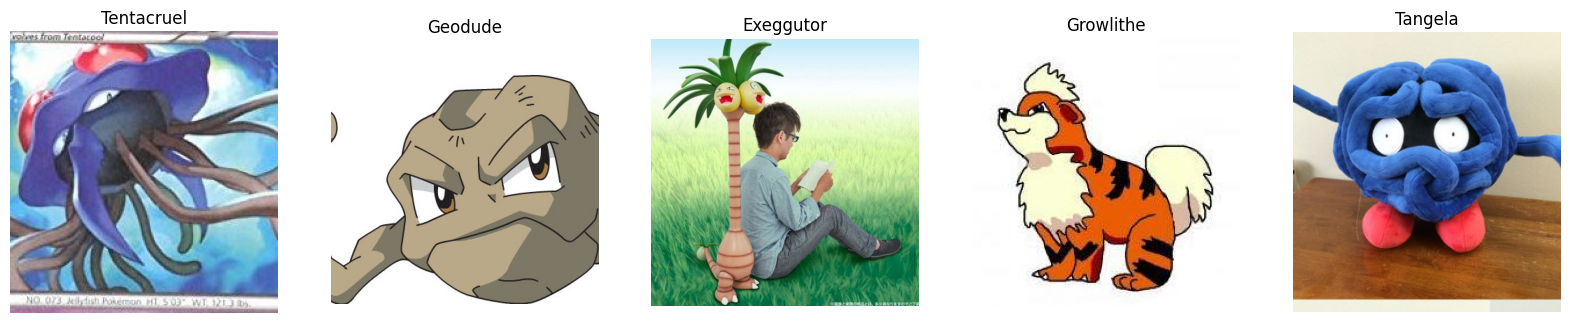

In [5]:
training_directory = 'data/training_set'
testing_directory = 'data/testing_set'


poke_list = os.listdir("data/images")
poke_dict = {string: index for index, string in enumerate(poke_list)}

fig, ax = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
    random_pokemon = random.choice(os.listdir(training_directory))
    random_pokemon_image = random.choice(os.listdir(training_directory + '/' + random_pokemon))
    img = mpimg.imread(training_directory + '/' + random_pokemon + '/' + random_pokemon_image)
    ax[i].set_title(random_pokemon)
    ax[i].axis('off')
    ax[i].imshow(img)

In [6]:
# can speed up our compilation by pre-processing our images at once
def resize_image(image_path):
    with Image.open(image_path) as i:
        if i.mode != 'RGB':
            i = i.convert('RGB')
        i = i.resize((64, 64))
        return np.array(i)

print("Getting Training Photos")
#loop through creating dataset that contains [label, path_to_image]
dataset = []
for poke_folder in os.listdir(training_directory):
    print(poke_folder, end=", ")
    for poke_img in os.listdir(training_directory + '/' + poke_folder):
        img = resize_image(training_directory + '/' + poke_folder + '/' + poke_img)
        dataset.append([poke_folder, img])
print("\nDone")
# place training data into x and labels into y
y_train = np.array([poke_dict[x[0]] for x in dataset])
x_train = np.array([x[1] for x in dataset])

# shuffle the lists with same order
zipped = list(zip(x_train, y_train))
random.shuffle(zipped)
x_train, y_train = zip(*zipped)
x_train, y_train = np.array(list(x_train)), np.array(list(y_train))

print("Getting Testing Photos")
dataset = []
for poke_folder in os.listdir(testing_directory):
    print(poke_folder, end=", ")
    for poke_img in os.listdir(testing_directory + '/' + poke_folder):
        img = resize_image(testing_directory + '/' + poke_folder + '/' + poke_img)
        dataset.append([poke_folder, img])
print("\nDone")

y_test = np.array([poke_dict[x[0]] for x in dataset])
x_test = np.array([x[1] for x in dataset])

# shuffle the lists with same order
zipped = list(zip(x_test, y_test))
random.shuffle(zipped)
x_test, y_test = zip(*zipped)
x_test, y_test = np.array(list(x_test)), np.array(list(y_test))

x_test = x_test / 255.0
x_train = x_train / 255.0

print("Reshaping")
# Flatten the image arrays for the MLP input
x_test = x_test.reshape(x_test.shape[0], -1)
x_train = x_train.reshape(x_train.shape[0], -1)
# split data into training and testing
# x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.20)
print("Done")

x_train = x_train.reshape(x_train.shape[0], 64, 64, 3)
x_test = x_test.reshape(x_test.shape[0], 64, 64, 3)

print(f"Number of training data: {len(y_train)}")
print(f"Number of testing data: {len(y_test)}")



Getting Training Photos
Zapdos, Kadabra, Alolan Sandslash, Omanyte, Shellder, Bellsprout, Eevee, Jolteon, Hypno, Seel, Zubat, Graveler, Magneton, Abra, Kingler, Alakazam, Clefable, Gyarados, Poliwag, Rapidash, Machamp, Pinsir, Muk, Seaking, Magikarp, Goldeen, Venusaur, Flareon, Jigglypuff, Doduo, Weedle, Vileplume, Arcanine, Tentacruel, Gloom, Charmeleon, Articuno, Sandshrew, Spearow, Marowak, Clefairy, Snorlax, Scyther, Primeape, Diglett, Onix, Mankey, Rattata, Voltorb, Gengar, Gastly, Cloyster, Weepinbell, Dragonair, Squirtle, Pikachu, Victreebel, Charmander, Staryu, Venonat, Vaporeon, Ivysaur, Krabby, Drowzee, Sandslash, Kangaskhan, Chansey, Butterfree, Starmie, Magmar, Beedrill, Ninetales, Magnemite, Metapod, Electrode, Raichu, Fearow, Mewtwo, Kabuto, Pidgeotto, Hitmonchan, Blastoise, Weezing, Golbat, Seadra, Rhyhorn, Moltres, Golduck, Kabutops, Aerodactyl, Haunter, Machop, Koffing, Pidgeot, Wigglytuff, Porygon, Vulpix, Dugtrio, Ditto, Raticate, Geodude, Tentacool, Horsea, Oddish, 

In [7]:



model = models.Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))



model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(.01)))
model.add(Dropout(0.2))
model.add(layers.Dense(151, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        2

In [8]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, 
                    batch_size= 512,
                    validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print(test_acc)


Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


11/11 [==============================] - 12s 1s/step - loss: 15.1657 - accuracy: 0.0165 - val_loss: 13.2531 - val_accuracy: 0.0049
Epoch 2/20
11/11 [==============================] - 11s 953ms/step - loss: 12.1264 - accuracy: 0.0412 - val_loss: 11.2873 - val_accuracy: 0.0105
Epoch 3/20
11/11 [==============================] - 10s 948ms/step - loss: 9.7766 - accuracy: 0.1009 - val_loss: 9.5319 - val_accuracy: 0.0231
Epoch 4/20
11/11 [==============================] - 10s 911ms/step - loss: 7.6658 - accuracy: 0.1974 - val_loss: 8.1156 - val_accuracy: 0.0525
Epoch 5/20
11/11 [==============================] - 10s 890ms/step - loss: 6.0742 - accuracy: 0.3026 - val_loss: 7.1816 - val_accuracy: 0.0637
Epoch 6/20
11/11 [==============================] - 10s 891ms/step - loss: 4.9015 - accuracy: 0.4107 - val_loss: 6.5271 - val_accuracy: 0.0924
Epoch 7/20
11/11 [==============================] - 10s 961ms/step - loss: 3.9953 - accuracy: 0.5232 - val_loss: 6.2217 - val_accuracy: 0.1064
Epoch 8/2

45/45 [==============================] - 1s 18ms/step


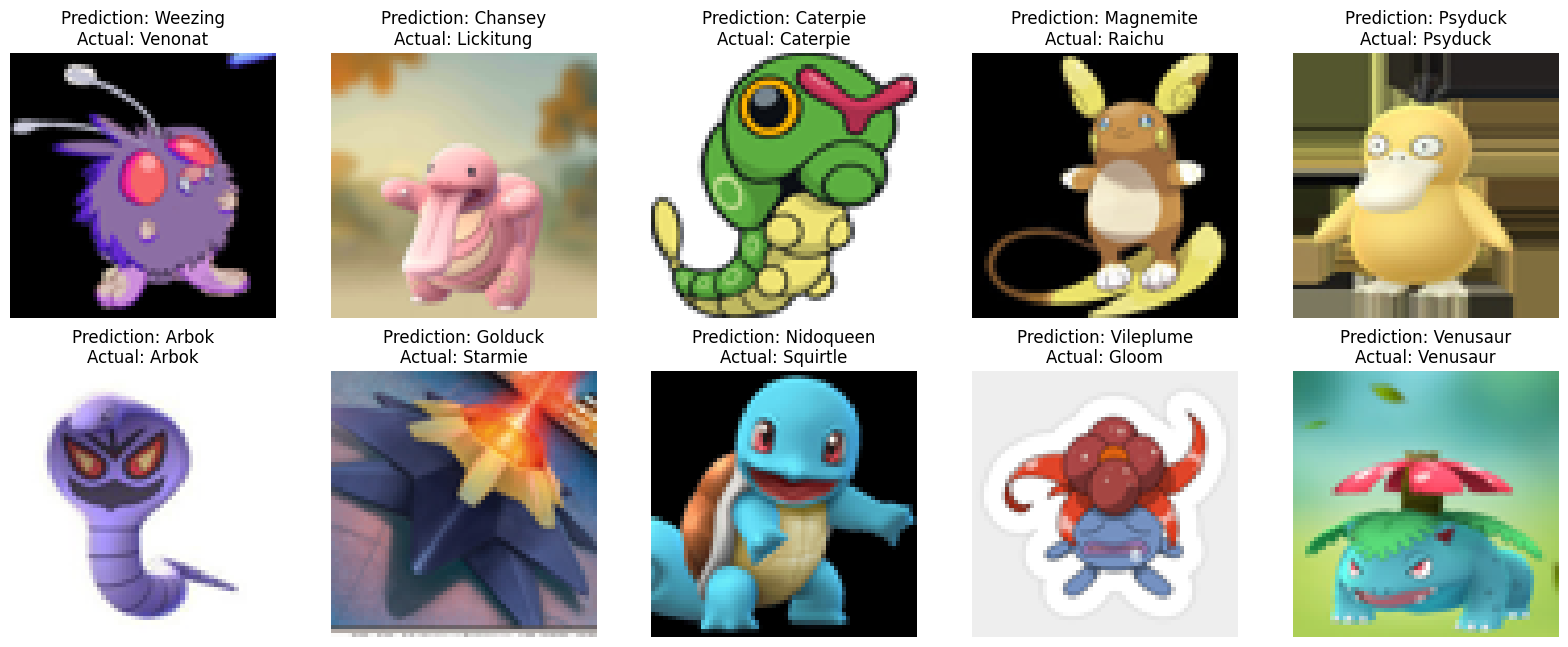

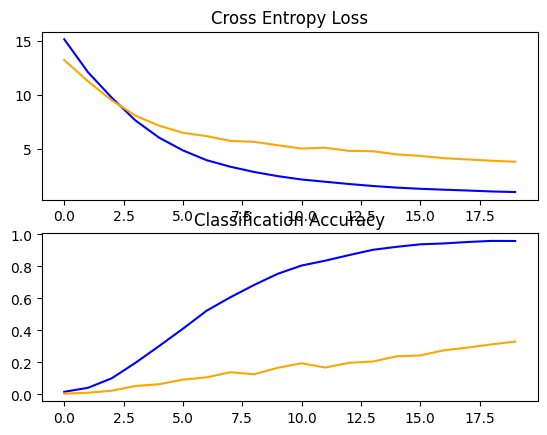

Accuracy for class: Zapdos       is 63.6 %
Accuracy for class: Kadabra      is 10.0 %
Accuracy for class: Alolan Sandslash is 11.1 %
Accuracy for class: Omanyte      is 66.7 %
Accuracy for class: Shellder     is 20.0 %
Accuracy for class: Bellsprout   is 50.0 %
Accuracy for class: Eevee        is 25.0 %
Accuracy for class: Jolteon      is 9.1 %
Accuracy for class: Hypno        is 60.0 %
Accuracy for class: Seel         is 10.0 %
Accuracy for class: Zubat        is 0.0 %
Accuracy for class: Graveler     is 87.5 %
Accuracy for class: Magneton     is 44.4 %
Accuracy for class: Abra         is 14.3 %
Accuracy for class: Kingler      is 20.0 %
Accuracy for class: Alakazam     is 16.7 %
Accuracy for class: Clefable     is 50.0 %
Accuracy for class: Gyarados     is 10.0 %
Accuracy for class: Poliwag      is 0.0 %
Accuracy for class: Rapidash     is 0.0 %
Accuracy for class: Machamp      is 54.5 %
Accuracy for class: Pinsir       is 0.0 %
Accuracy for class: Muk          is 33.3 %
Accuracy for

In [30]:
import sys

def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    # filename = sys.argv[0].split('/')[-1]
    # plt.savefig(filename + '_plot.png')
    # plt.close()




# Prepare to count predictions for each class
correct_pred = {classname: 0 for classname in poke_list}
total_pred = {classname: 0 for classname in poke_list}

# Get model predictions on the test set
predictions = model.predict(x_test)
predicted_labels = tf.argmax(predictions, axis=1)

# Plot the  first 10 images in 2 rows test image and predicted label using Matplotlib, state the prediction vs actual name
plt.figure(figsize=(20, 20))
for i in range(10):
    ax = plt.subplot(5, 5, i + 1)

    plt.imshow(x_test[i], cmap=plt.cm.binary)    
    plt.title(f"Prediction: {poke_list[predicted_labels[i]]}\nActual: {poke_list[y_test[i]]}")
    
    plt.axis("off")

plt.savefig("output/predictions.png")
plt.show()

summarize_diagnostics(history)
plt.savefig("output/accuracy.png")
plt.show()

# Collect the correct predictions for each class
for true_label, predicted_label in zip(y_test, predicted_labels):
    true_class = poke_list[true_label]
    if true_label == predicted_label:
        correct_pred[true_class] += 1
    total_pred[true_class] += 1

# Print accuracy for each class
for classname, correct_count in correct_pred.items():
    if total_pred[classname] != 0:
        accuracy = 100 * float(correct_count) / total_pred[classname]
    else:
        accuracy = 0
    print(f'Accuracy for class: {classname:12s} is {accuracy:.1f} %')

# Print overall accuracy
overall_accuracy = 100 * (sum(correct_pred.values()) / sum(total_pred.values()))
print(f'Overall accuracy is {overall_accuracy:.1f} %')



# Save Model

In [17]:
model.save('output/pokemon_classifier.keras')

# Load Model

In [40]:
from keras.models import load_model

model = load_model('output/pokemon_classifier.keras')

# Feature Map Visualizations

In [53]:
from keras.models import Model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from matplotlib import pyplot
from numpy import expand_dims
from keras.models import load_model

from helper_functions import pick_random_image



# test the model on a random image
img_path = pick_random_image()
print(img_path.split("/")[1])
img = load_img("data/"+img_path, target_size=(64, 64))
img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)

#check what model thinks of it
result = model.predict(img)
#convert resulting to pokemon name
result = poke_list[np.argmax(result)]
print(result)






Nidoqueen
1/1 [==============================] - 0s 10ms/step
Ponyta
